In [ ]:
#Importing all libraries

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
from sklearn.model_selection import train_test_split
style.use('ggplot')

In [ ]:
#Open the dataset

In [2]:
df = pd.read_csv('data set/Stock Data Set.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1/2/1970,2.2972,2.3178,2.2972,2.2972,26437,0
1,1/5/1970,2.2972,2.2972,2.2544,2.2759,29887,0
2,1/6/1970,2.2759,2.2759,2.2342,2.2342,106900,0
3,1/7/1970,2.2342,2.2342,2.2342,2.2342,85061,0
4,1/8/1970,2.2342,2.2342,2.2139,2.2139,66669,0


In [ ]:
#selecting column

In [4]:
df = df[['Open','High', 'Low', 'Close', 'Volume']]

In [5]:
df.head()

,Open,High,Low,Close,Volume
0,2.2972,2.3178,2.2972,2.2972,26437
1,2.2972,2.2972,2.2544,2.2759,29887
2,2.2759,2.2759,2.2342,2.2342,106900
3,2.2342,2.2342,2.2342,2.2342,85061
4,2.2342,2.2342,2.2139,2.2139,66669


In [6]:
df['HL_PCT'] = (df['High'] -df['Low']) / df['Close'] * 100.0

In [7]:
df.head()

,Open,High,Low,Close,Volume,HL_PCT
0,2.2972,2.3178,2.2972,2.2972,26437,0.896744
1,2.2972,2.2972,2.2544,2.2759,29887,1.880575
2,2.2759,2.2759,2.2342,2.2342,106900,1.866440
3,2.2342,2.2342,2.2342,2.2342,85061,0.000000
4,2.2342,2.2342,2.2139,2.2139,66669,0.916934


In [8]:
df['PCT_Change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [9]:
df.head()

,Open,High,Low,Close,Volume,HL_PCT,PCT_Change
0,2.2972,2.3178,2.2972,2.2972,26437,0.896744,0.000000
1,2.2972,2.2972,2.2544,2.2759,29887,1.880575,-0.927216
2,2.2759,2.2759,2.2342,2.2342,106900,1.866440,-1.832242
3,2.2342,2.2342,2.2342,2.2342,85061,0.000000,0.000000
4,2.2342,2.2342,2.2139,2.2139,66669,0.916934,-0.908603


In [10]:
df = df[['Close', 'HL_PCT', 'PCT_Change', 'Volume']]

In [11]:
df.head()

,Close,HL_PCT,PCT_Change,Volume
0,2.2972,0.896744,0.000000,26437
1,2.2759,1.880575,-0.927216,29887
2,2.2342,1.866440,-1.832242,106900
3,2.2342,0.000000,0.000000,85061
4,2.2139,0.916934,-0.908603,66669


In [12]:
df.size

48296

In [13]:
df.info

<bound method DataFrame.info of          Close    HL_PCT  PCT_Change   Volume
0       2.2972  0.896744    0.000000    26437
1       2.2759  1.880575   -0.927216    29887
2       2.2342  1.866440   -1.832242   106900
3       2.2342  0.000000    0.000000    85061
4       2.2139  0.916934   -0.908603    66669
...        ...       ...         ...      ...
12069  47.2900  2.431804    0.190678  1725638
12070  46.9700  1.414094   -0.297177  2168351
12071  45.8900  3.050774   -1.797560  3347930
12072  43.3300  3.692592   -3.086558  7671810
12073  43.0100  3.975820    0.186350  4463839

[12074 rows x 4 columns]>

In [14]:
df.empty

False

In [15]:
pre_col = 'Close'
df.fillna(value=-9999, inplace=True)
pre_out = int(math.ceil(0.0025 * len(df)))
df['label'] = df[pre_col].shift(-pre_out)
df.dropna(inplace=True)

In [16]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

In [17]:
X = preprocessing.scale(X)

In [18]:
y = np.array(df['label'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9658320621845772


In [ ]:
#prediction

In [21]:
X_lately = X[-pre_out:]
#X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.968078653555788


In [28]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan
#print(forecast_set, confidence, forecast_out)
#df['Forecast'] = np.nan


last_date = df.iloc[-1].name
#last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_date + one_day
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

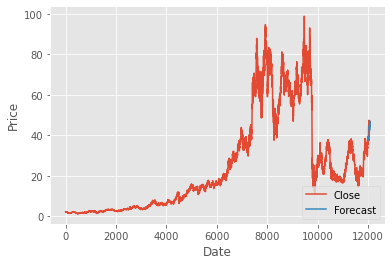

In [30]:
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
#clf = LinearRegression()
clf = LinearRegression(n_jobs=-1)
#for k in ['linear','poly','rbf','sigmoid']:
#    clf = svm.SVR(kernel=k)
#    clf.fit(X_train, y_train)
#   confidence = clf.score(X_test, y_test)
#    print(k,confidence)